## Credit Risk Scoring Project

Using decision trees and ensemble to minimize the risk of default - failure of customer to return the money.

We will use the [CreditScoring.csv](https://github.com/gastonstat/CreditScoring/blob/master/CreditScoring.csv) dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("./data/CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
# Check if all the column has the correct type infered.
all(df.dtypes == "int64")

True

In [4]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
# Check if there are any null values.
df.isnull().sum().sum() == 0

True

In [6]:
status_values = {1: "ok", 2: "default", 0: "unk"}

df.status = df.status.map(status_values)
np.unique(df.status)

array(['default', 'ok', 'unk'], dtype=object)

In [7]:
home_values = {
    1: "rent",
    2: "owner",
    3: "private",
    4: "ignore",
    5: "parents",
    6: "other",
    0: "unk",
}
df.home = df.home.map(home_values)

In [8]:
marital_values = {
    1: "single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "parents",
    6: "other",
    0: "unk",
}

df.marital = df.marital.map(marital_values)

In [9]:
records_values = {1: "no", 2: "yes", 3: "unk"}
df.records = df.records.map(records_values)

In [10]:
job_values = {1: "fixed", 2: "partime", 3: "freelance", 4: "others", 0: "unk"}

df.job = df.job.map(job_values)

In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [12]:
# Rounding avoids scientific notation in large numbers.
# Pay attention to the `income`, `assets` and `debt` max values.
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
# Replace problematic values with NaN.
for c in ["income", "assets", "debt"]:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [14]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [15]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [16]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [17]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [18]:
# Remove the row with unk status.
df = df[df.status != "unk"]

In [19]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [21]:
y_train = (df_train.status == "default").values
y_val = (df_val.status == "default").values

del df_train["status"]
del df_val["status"]

In [22]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [23]:
dict_train = df_train.to_dict(orient="records")
dict_val = df_val.to_dict(orient="records")

In [24]:
dict_train[0]

{'seniority': 14,
 'home': 'owner',
 'time': 60,
 'age': 30,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 45,
 'income': 120.0,
 'assets': 6500.0,
 'debt': 3000.0,
 'amount': 760,
 'price': 895}

In [25]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import roc_auc_score

y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [28]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6430041152263375

In [30]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [36]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- income <= 83.50
|   |   |--- class: False
|   |--- income >  83.50
|   |   |--- class: False
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [37]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print("train auc", auc)

train auc 0.7331126246567423


In [38]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("validation auc", auc)

validation auc 0.6989407102575826


In [43]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print("{:4s} -> {:.3f}".format(str(depth), auc))

1    -> 0.595
2    -> 0.699
3    -> 0.740
4    -> 0.761
5    -> 0.764
6    -> 0.741
10   -> 0.650
15   -> 0.650
20   -> 0.651
None -> 0.638


In [45]:
# From the result above, 4, 5, and 6 max_depth produces the optimal values.
for m in [4, 5, 6]:
    print("depth: ", m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print("{:4s} -> {:.3f}".format(str(s), auc))
    print()

depth:  4
1    -> 0.761
5    -> 0.761
10   -> 0.761
15   -> 0.758
20   -> 0.757
50   -> 0.744
100  -> 0.752
200  -> 0.749

depth:  5
1    -> 0.764
5    -> 0.763
10   -> 0.766
15   -> 0.767
20   -> 0.766
50   -> 0.761
100  -> 0.761
200  -> 0.751

depth:  6
1    -> 0.740
5    -> 0.746
10   -> 0.757
15   -> 0.769
20   -> 0.771
50   -> 0.767
100  -> 0.765
200  -> 0.751



## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [49]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7884564090839811

In [50]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print("{} -> {:.3f}".format(i, auc))
    aucs.append(auc)

10 -> 0.788
20 -> 0.796
30 -> 0.807
40 -> 0.808
50 -> 0.812
60 -> 0.815
70 -> 0.815
80 -> 0.813
90 -> 0.813
100 -> 0.814
110 -> 0.813
120 -> 0.812
130 -> 0.811
140 -> 0.811
150 -> 0.811
160 -> 0.810
170 -> 0.811
180 -> 0.810
190 -> 0.810
200 -> 0.810


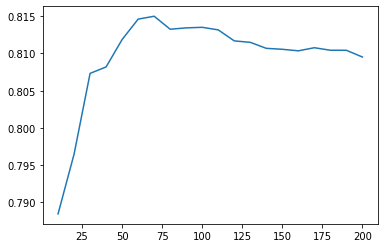

In [51]:
plt.plot(range(10, 201, 10), aucs)